# Stimuli Acoustic Features Visualization
## Analysis for Pre/Post Longitudinal Design

This notebook visualizes the acoustic features of emotional prosody stimuli to help select balanced stimuli for the experiment.

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Load Data

In [17]:
# Load the data
df = pd.read_csv('/Users/tongshan/Documents/PRT_EEG/stimuli/stimuli_features_results.csv',header=0)


# Display basic info
print(f"Total stimuli: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

Total stimuli: 15

Columns: ['filename', 'emotion', 'gender', 'adult_kid', 'duration_seconds', 'f0_min_hz', 'f0_max_hz', 'pitch_range_hz', 'mean_pitch_hz', 'pitch_variability_hz', 'phonation_time_ratio', 'syllable_rate', 'in_pilot', 'in_SL']

First few rows:
                     filename emotion  gender adult_kid  duration_seconds  \
0  12008_1_1_happy_studio.wav   happy    male       kid           208.500   
1    12008_1_1_sad_studio.wav     sad    male       kid           337.562   
2  12008_1_2_happy_studio.wav   happy    male       kid           280.617   
3    12008_1_2_sad_studio.wav     sad    male       kid           141.182   
4  12014_1_2_happy_studio.wav   happy  female     adult           136.489   

   f0_min_hz  f0_max_hz  pitch_range_hz  mean_pitch_hz  pitch_variability_hz  \
0      77.38     397.89          320.51         228.44                 28.48   
1      75.06     374.72          299.65         218.80                 25.36   
2      78.13     397.11          318.9

## 2. Data Summary

In [18]:
# Summary statistics
print("=" * 80)
print("CATEGORICAL VARIABLES SUMMARY")
print("=" * 80)

print("\nEmotion Distribution:")
print(df['emotion'].value_counts())

print("\nGender Distribution:")
print(df['gender'].value_counts())

print("\nAdult/Kid Distribution:")
print(df['adult_kid'].value_counts())

print("\nIn Pilot:")
print(df['in_pilot'].value_counts())

print("\nIn SL:")
print(df['in_SL'].value_counts())

print("\n" + "=" * 80)
print("ACOUSTIC FEATURES SUMMARY")
print("=" * 80)

acoustic_features = ['mean_pitch_hz', 'pitch_range_hz', 'pitch_variability_hz', 
                     'phonation_time_ratio', 'syllable_rate', 'duration_seconds']
df[acoustic_features].describe()

CATEGORICAL VARIABLES SUMMARY

Emotion Distribution:
emotion
happy          7
sad            6
spontaneous    2
Name: count, dtype: int64

Gender Distribution:
gender
female    8
male      7
Name: count, dtype: int64

Adult/Kid Distribution:
adult_kid
adult    8
kid      7
Name: count, dtype: int64

In Pilot:
in_pilot
N    10
Y     5
Name: count, dtype: int64

In SL:
in_SL
N    13
Y     2
Name: count, dtype: int64

ACOUSTIC FEATURES SUMMARY


,mean_pitch_hz,pitch_range_hz,pitch_variability_hz,phonation_time_ratio,syllable_rate,duration_seconds
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,229.896000,316.272667,40.069333,0.550180,5.806000,183.989133
std,24.508736,12.014291,9.332047,0.056318,0.690184,95.576634
min,182.800000,282.210000,25.360000,0.438800,4.880000,50.062000
25%,223.125000,313.285000,30.845000,0.511950,5.260000,138.622000
50%,240.740000,320.510000,42.280000,0.544200,5.730000,147.411000
75%,246.965000,324.225000,48.645000,0.600800,6.245000,208.462500
max,259.170000,324.990000,51.920000,0.623600,7.000000,411.518000


## 2.0 Overall Distribution of Categorical Features

Visualizing the distribution of categorical variables across all stimuli.

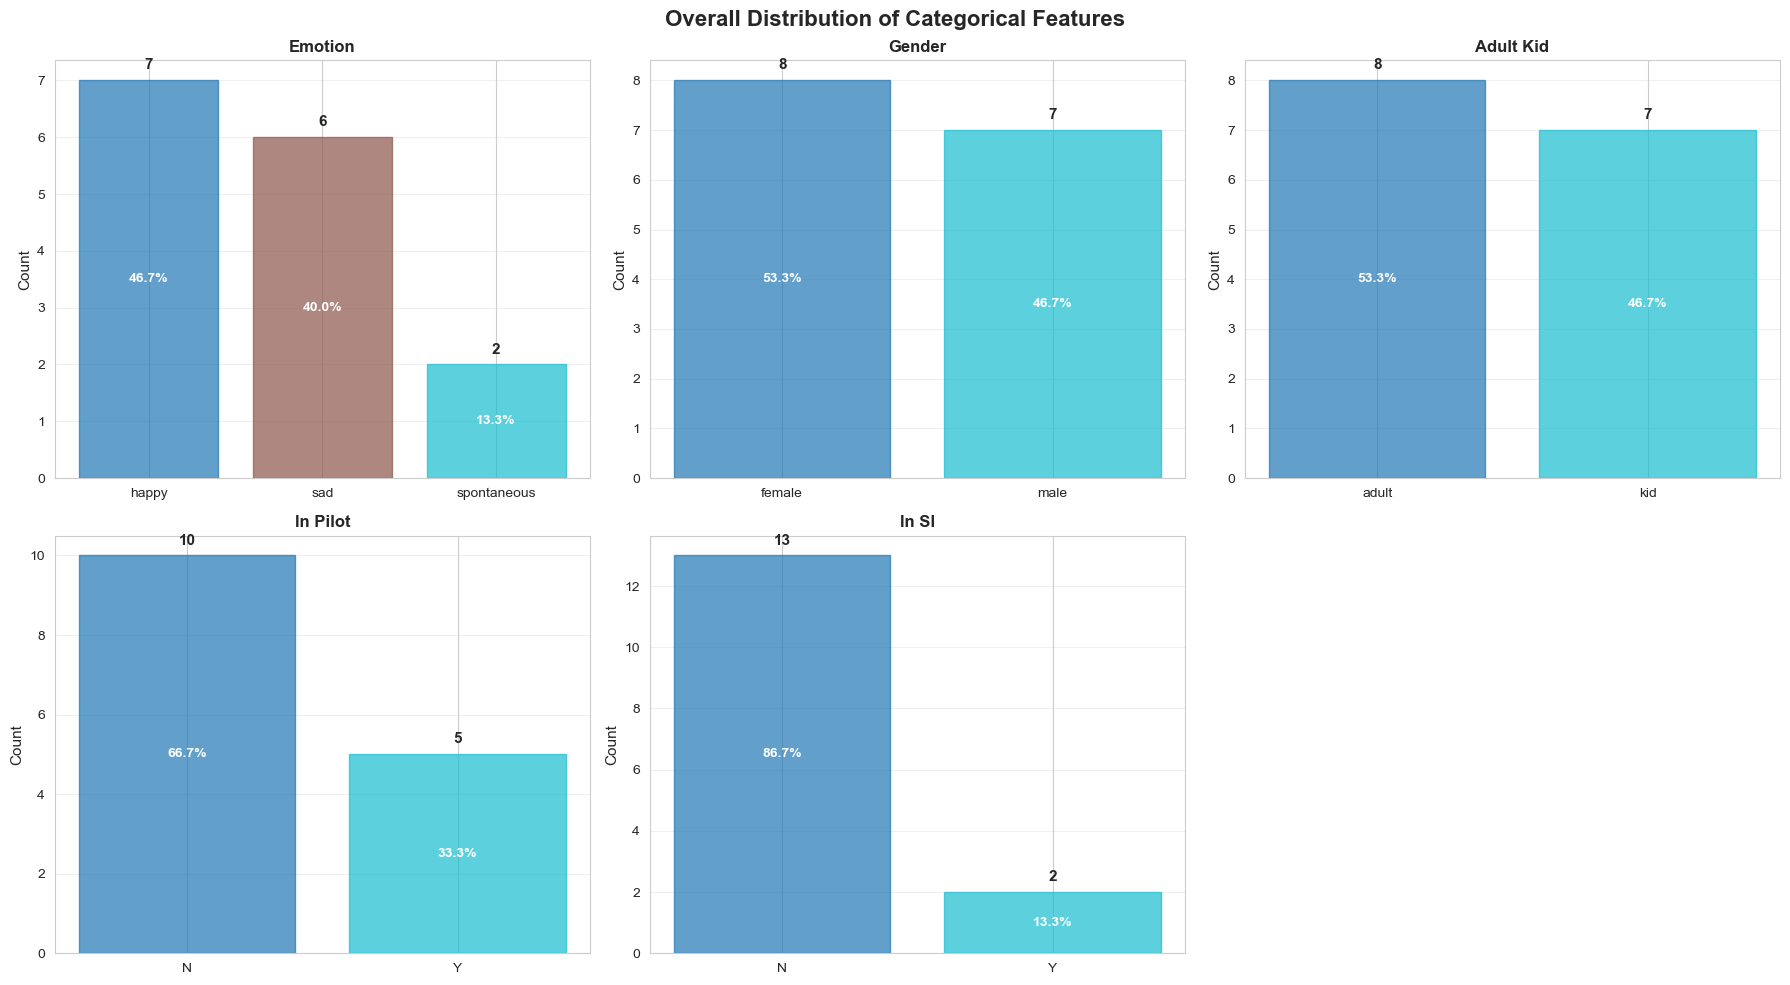

CATEGORICAL VARIABLES DETAILED SUMMARY

EMOTION:
------------------------------------------------------------
  happy               :  7 ( 46.7%)
  sad                 :  6 ( 40.0%)
  spontaneous         :  2 ( 13.3%)
  Total               : 15

GENDER:
------------------------------------------------------------
  female              :  8 ( 53.3%)
  male                :  7 ( 46.7%)
  Total               : 15

ADULT KID:
------------------------------------------------------------
  adult               :  8 ( 53.3%)
  kid                 :  7 ( 46.7%)
  Total               : 15

IN PILOT:
------------------------------------------------------------
  N                   : 10 ( 66.7%)
  Y                   :  5 ( 33.3%)
  Total               : 15

IN SL:
------------------------------------------------------------
  N                   : 13 ( 86.7%)
  Y                   :  2 ( 13.3%)
  Total               : 15


In [19]:
# Categorical variables to visualize
categorical_vars = ['emotion', 'gender', 'adult_kid', 'in_pilot', 'in_SL']

# Create subplots for categorical distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Overall Distribution of Categorical Features', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    ax = axes[idx]
    
    # Count values
    counts = df[var].value_counts().sort_index()
    
    # Create bar plot
    bars = ax.bar(range(len(counts)), counts.values, edgecolor='black', alpha=0.7)
    
    # Color bars differently for better visualization using a darker, bolder colormap
    colors = plt.cm.tab10(np.linspace(0, 1, len(counts)))
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # Add count labels on top of bars
    for i, (label, count) in enumerate(counts.items()):
        ax.text(i, count + max(counts.values)*0.02, str(count), 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Set labels
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=0)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title(f'{var.replace("_", " ").title()}', fontweight='bold', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Add percentage annotations
    total = counts.sum()
    for i, count in enumerate(counts.values):
        percentage = (count / total) * 100
        ax.text(i, count/2, f'{percentage:.1f}%', 
                ha='center', va='center', fontweight='bold', fontsize=10, color='white')

# Remove the extra subplot (we only have 5 variables)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Print detailed summary
print("=" * 80)
print("CATEGORICAL VARIABLES DETAILED SUMMARY")
print("=" * 80)

for var in categorical_vars:
    counts = df[var].value_counts()
    total = len(df)
    print(f"\n{var.replace('_', ' ').upper()}:")
    print("-" * 60)
    for label, count in counts.items():
        percentage = (count / total) * 100
        print(f"  {label:20s}: {count:2d} ({percentage:5.1f}%)")
    print(f"  {'Total':20s}: {total:2d}")

## 2.1 Overall Distribution of Acoustic Features

Visualizing the distribution of each acoustic feature across all stimuli (not grouped by emotion).

TypeError: can't multiply sequence by non-int of type 'float'

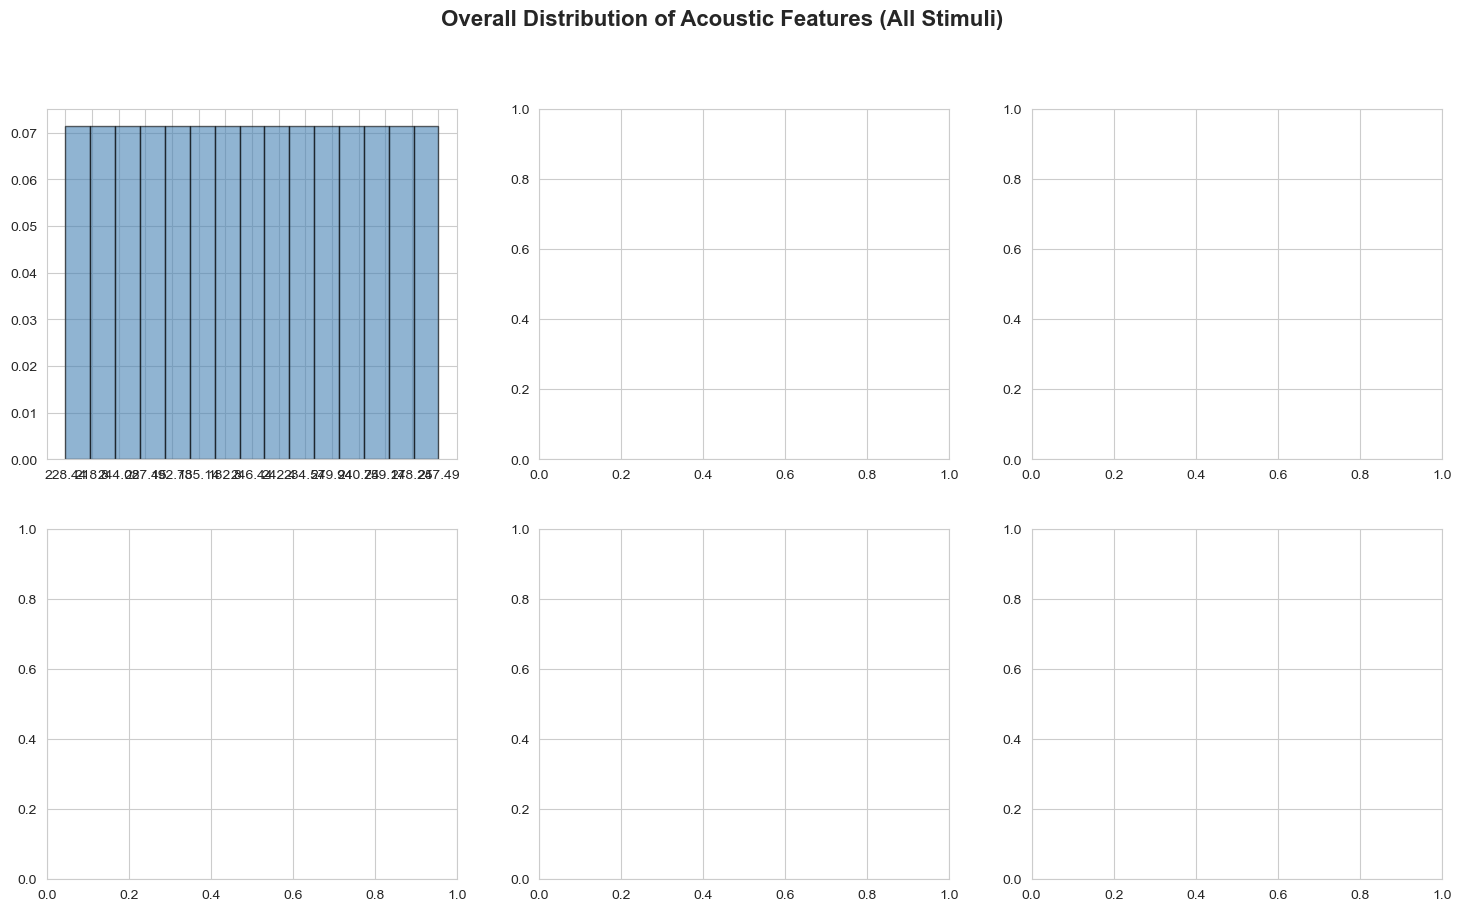

In [14]:
# Define features for visualization
features = [
    ('mean_pitch_hz', 'Mean Pitch (Hz)'),
    ('pitch_range_hz', 'Pitch Range (Hz)'),
    ('pitch_variability_hz', 'Pitch Variability (Hz)'),
    ('phonation_time_ratio', 'Phonation Time Ratio'),
    ('syllable_rate', 'Syllable Rate (syl/sec)'),
    ('duration_seconds', 'Duration (seconds)')
]

# Create subplots for overall distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Overall Distribution of Acoustic Features (All Stimuli)', fontsize=16, fontweight='bold')

for idx, (feature, title) in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    
    # Histogram with KDE
    ax.hist(df[feature], bins=15, alpha=0.6, color='steelblue', edgecolor='black', density=True)
    
    # Add KDE curve
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(df[feature].dropna())
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)
    ax.plot(x_range, kde(x_range), color='darkred', linewidth=2, label='KDE')
    
    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Add individual points at the bottom
    ax.scatter(df[feature], np.zeros(len(df)), alpha=0.5, s=50, color='navy', zorder=3)
    
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_xlabel(title)
    ax.set_ylabel('Density')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 80)
print("OVERALL SUMMARY STATISTICS FOR ACOUSTIC FEATURES")
print("=" * 80)
for feature, title in features:
    print(f"\n{title}:")
    print(f"  Mean:   {df[feature].mean():.2f}")
    print(f"  Median: {df[feature].median():.2f}")
    print(f"  SD:     {df[feature].std():.2f}")
    print(f"  Min:    {df[feature].min():.2f}")
    print(f"  Max:    {df[feature].max():.2f}")
    print(f"  Range:  {df[feature].max() - df[feature].min():.2f}")

## 3. Distribution of Acoustic Features by Emotion

In [ ]:
# Create violin plots for each acoustic feature by emotion
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Acoustic Features Distribution by Emotion', fontsize=16, fontweight='bold')

features = [
    ('mean_pitch_hz', 'Mean Pitch (Hz)'),
    ('pitch_range_hz', 'Pitch Range (Hz)'),
    ('pitch_variability_hz', 'Pitch Variability (Hz)'),
    ('phonation_time_ratio', 'Phonation Time Ratio'),
    ('syllable_rate', 'Syllable Rate (syl/sec)'),
    ('duration_seconds', 'Duration (seconds)')
]

for idx, (feature, title) in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    sns.violinplot(data=df, x='emotion', y=feature, ax=ax, palette='Set2')
    sns.swarmplot(data=df, x='emotion', y=feature, ax=ax, color='black', alpha=0.5, size=4)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Emotion')
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_76686/2207874932.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_76686/2207874932.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_76686/2207874932.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_76686/2207874932.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

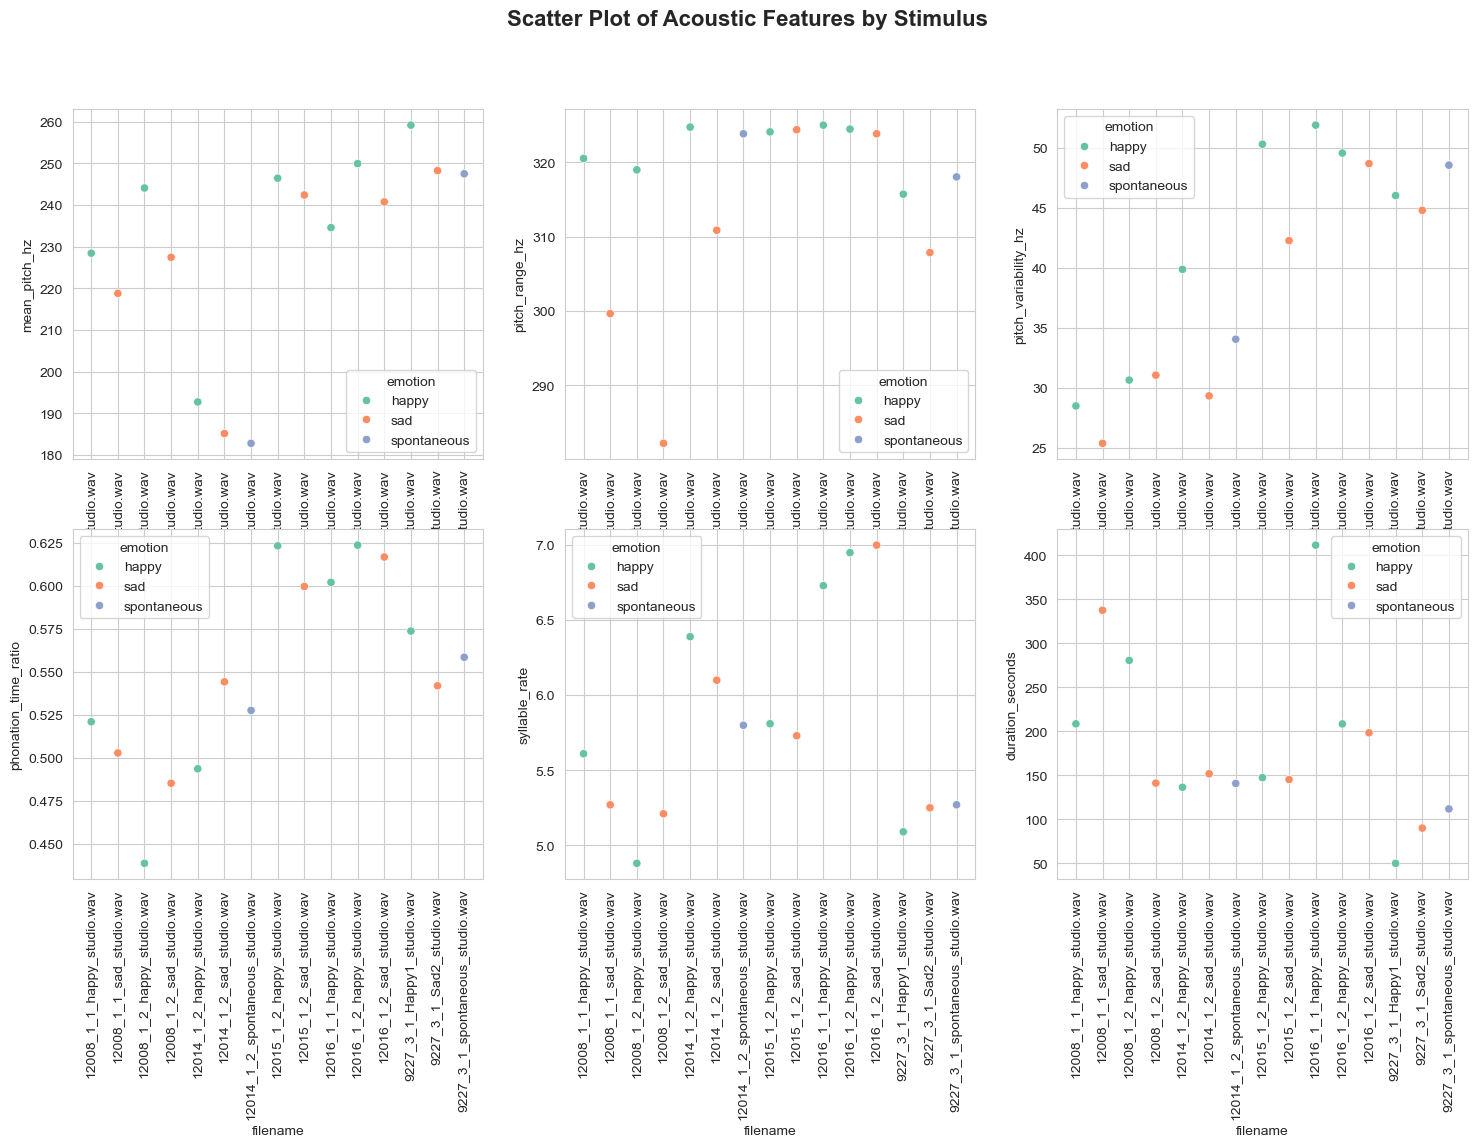

In [26]:
# scatter plot for each feature by each stimulus
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Scatter Plot of Acoustic Features by Stimulus', fontsize=16, fontweight='bold')

for idx, (feature, title) in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(data=df, x='filename', y=feature, ax=ax, hue='emotion', palette='Set2')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_92060/3319703382.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


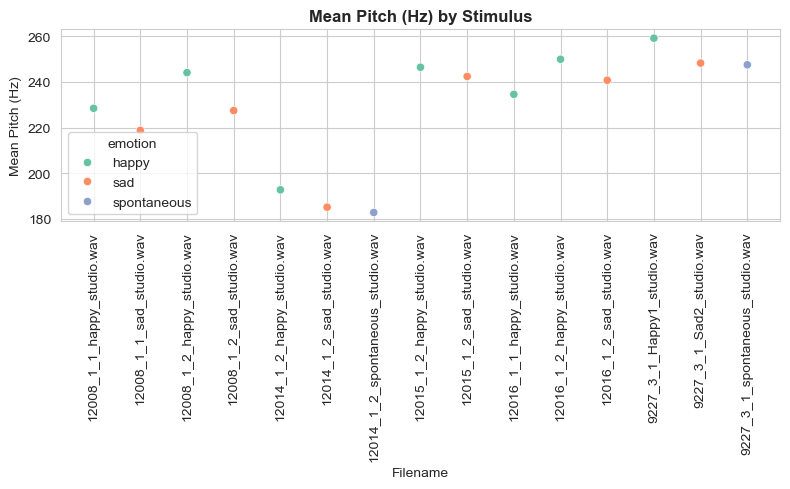

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_92060/3319703382.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


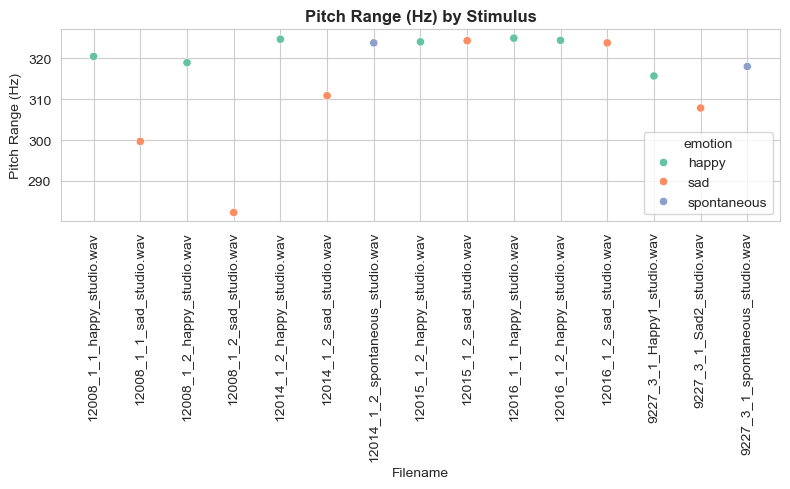

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_92060/3319703382.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


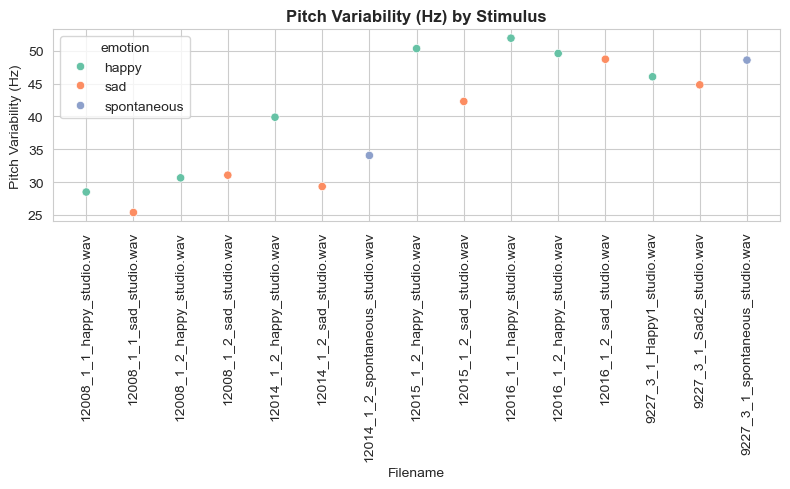

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_92060/3319703382.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


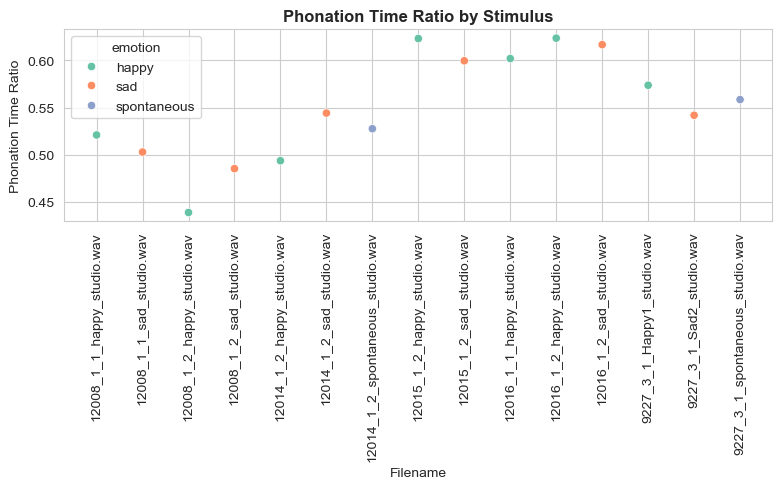

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_92060/3319703382.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


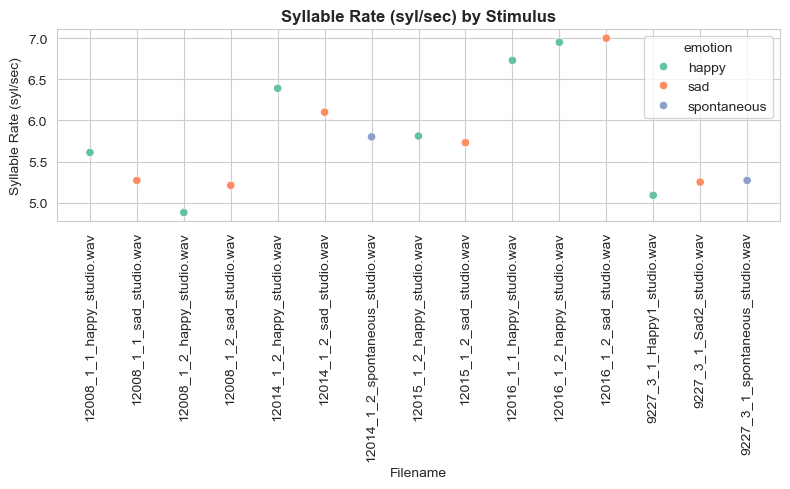

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_92060/3319703382.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


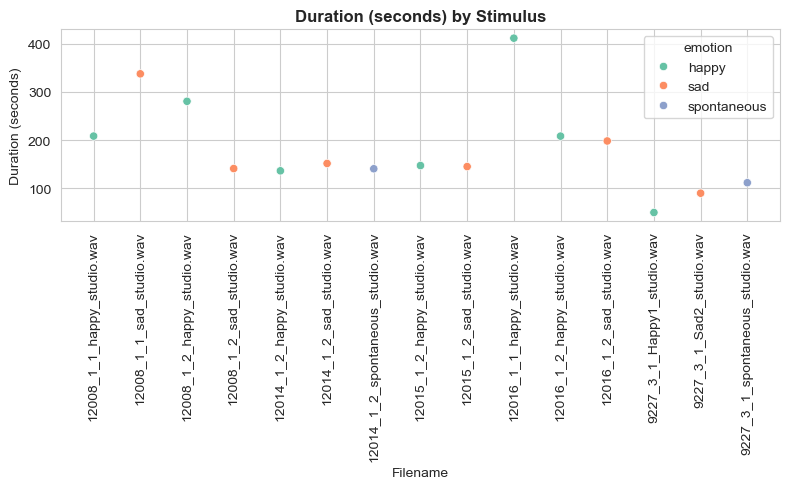

In [8]:
# scatter plot for each feature by each stimulus

for idx, (feature, title) in enumerate(features):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(data=df, x='filename', y=feature, ax=ax, hue='emotion', palette='Set2')
    ax.set_title(title + " by Stimulus", fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('Filename')
    ax.set_ylabel(title)
    plt.tight_layout()
    plt.show()

## 4. Statistical Comparison by Emotion

In [ ]:
# Compute mean and std for each emotion
print("=" * 80)
print("ACOUSTIC FEATURES BY EMOTION (Mean ± SD)")
print("=" * 80)

for emotion in df['emotion'].unique():
    emotion_data = df[df['emotion'] == emotion]
    print(f"\n{emotion.upper()} (n={len(emotion_data)}):")
    print("-" * 60)
    for feature, title in features[:5]:  # Skip duration for now
        mean_val = emotion_data[feature].mean()
        std_val = emotion_data[feature].std()
        print(f"  {title:30s}: {mean_val:6.2f} ± {std_val:5.2f}")

## 5. Distribution by Gender and Adult/Kid

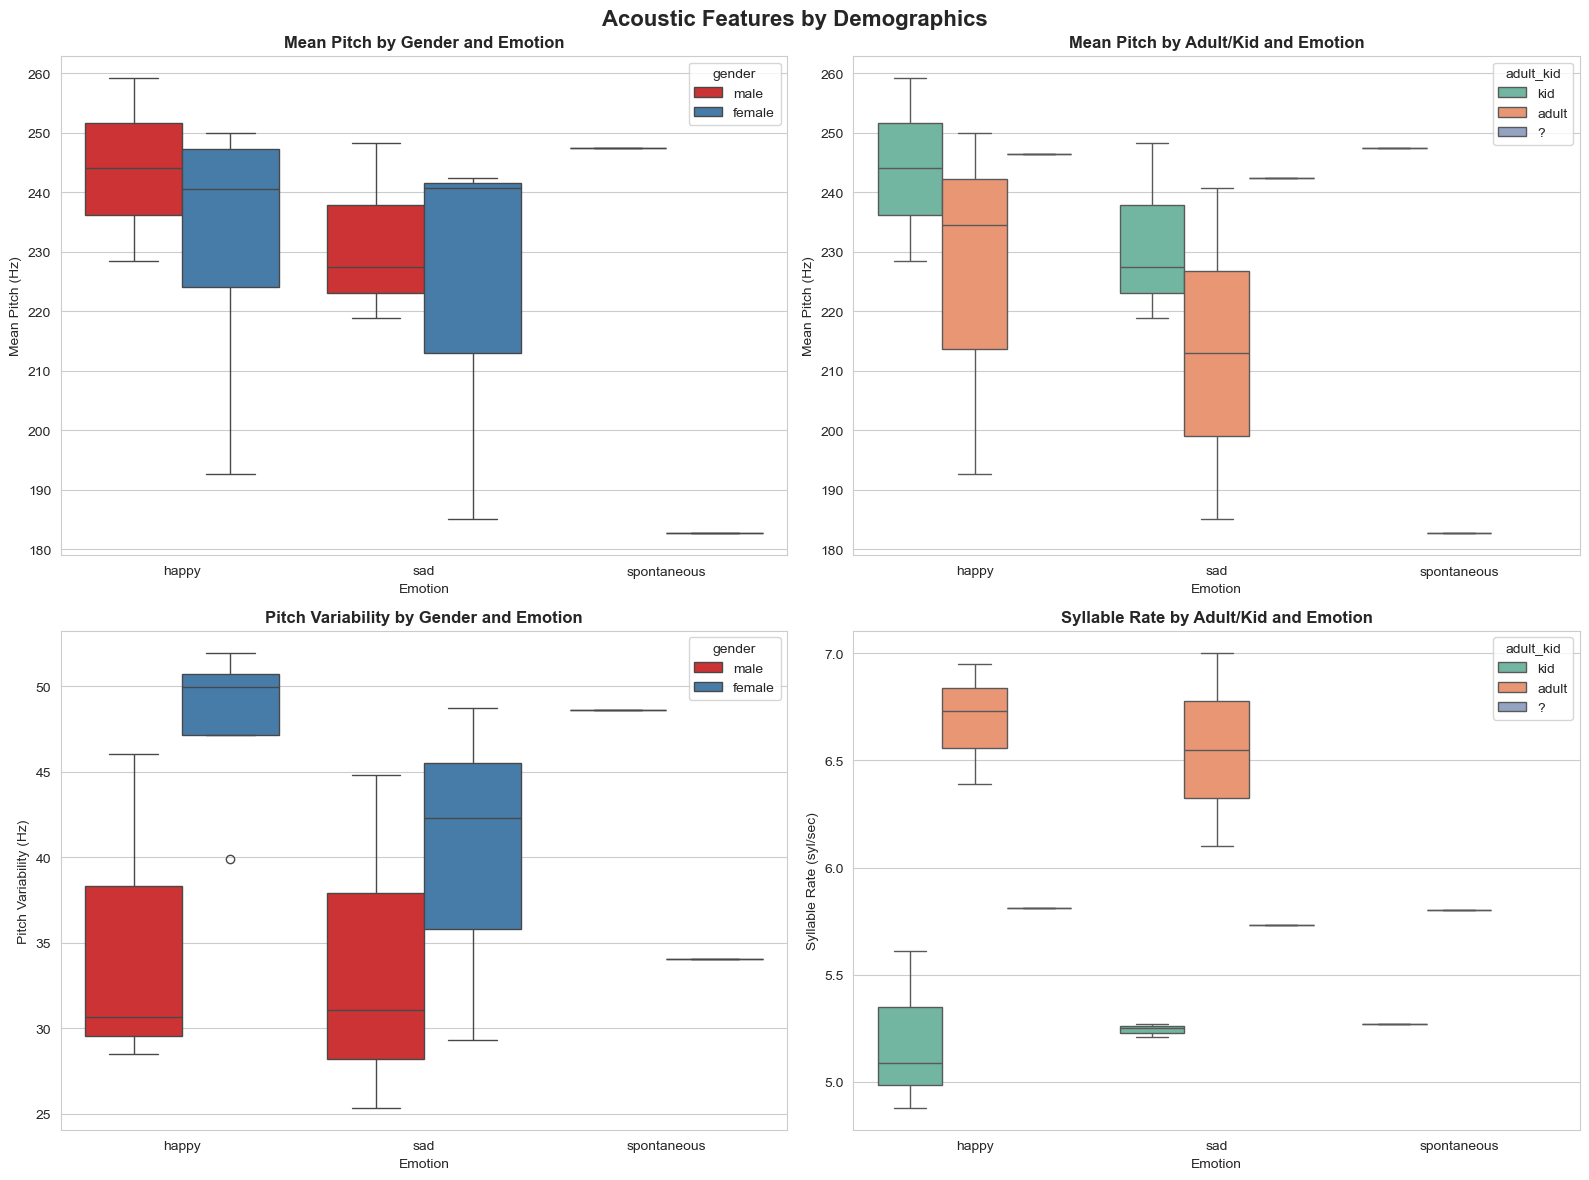

In [24]:
# Create subplots for gender and adult_kid comparisons
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Acoustic Features by Demographics', fontsize=16, fontweight='bold')

# Mean Pitch by Gender and Emotion
sns.boxplot(data=df, x='emotion', y='mean_pitch_hz', hue='gender', ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Mean Pitch by Gender and Emotion', fontweight='bold')
axes[0, 0].set_ylabel('Mean Pitch (Hz)')
axes[0, 0].set_xlabel('Emotion')

# Mean Pitch by Adult/Kid and Emotion
sns.boxplot(data=df, x='emotion', y='mean_pitch_hz', hue='adult_kid', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Mean Pitch by Adult/Kid and Emotion', fontweight='bold')
axes[0, 1].set_ylabel('Mean Pitch (Hz)')
axes[0, 1].set_xlabel('Emotion')

# Pitch Variability by Gender and Emotion
sns.boxplot(data=df, x='emotion', y='pitch_variability_hz', hue='gender', ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Pitch Variability by Gender and Emotion', fontweight='bold')
axes[1, 0].set_ylabel('Pitch Variability (Hz)')
axes[1, 0].set_xlabel('Emotion')

# Syllable Rate by Adult/Kid and Emotion
sns.boxplot(data=df, x='emotion', y='syllable_rate', hue='adult_kid', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Syllable Rate by Adult/Kid and Emotion', fontweight='bold')
axes[1, 1].set_ylabel('Syllable Rate (syl/sec)')
axes[1, 1].set_xlabel('Emotion')

plt.tight_layout()
plt.show()

## 6. Pilot and SL Distribution

In [ ]:
# Cross-tabulation
print("=" * 80)
print("STIMULI USAGE STATUS")
print("=" * 80)

print("\nEmotion x In Pilot:")
print(pd.crosstab(df['emotion'], df['in_pilot']))

print("\nEmotion x In SL:")
print(pd.crosstab(df['emotion'], df['in_SL']))

print("\nGender x In Pilot:")
print(pd.crosstab(df['gender'], df['in_pilot']))

print("\nAdult/Kid x In Pilot:")
print(pd.crosstab(df['adult_kid'], df['in_pilot']))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# In Pilot
pilot_counts = pd.crosstab(df['emotion'], df['in_pilot'])
pilot_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Stimuli in Pilot by Emotion', fontweight='bold')
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Count')
axes[0].legend(title='In Pilot')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# In SL
sl_counts = pd.crosstab(df['emotion'], df['in_SL'])
sl_counts.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Stimuli in SL by Emotion', fontweight='bold')
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Count')
axes[1].legend(title='In SL')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 7. Feature Correlations

In [ ]:
# Correlation matrix
acoustic_cols = ['mean_pitch_hz', 'pitch_range_hz', 'pitch_variability_hz', 
                 'phonation_time_ratio', 'syllable_rate', 'duration_seconds']

corr_matrix = df[acoustic_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Acoustic Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nStrong correlations (|r| > 0.5):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(f"  {corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: r = {corr_matrix.iloc[i, j]:.3f}")

## 8. Pairwise Feature Relationships by Emotion

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

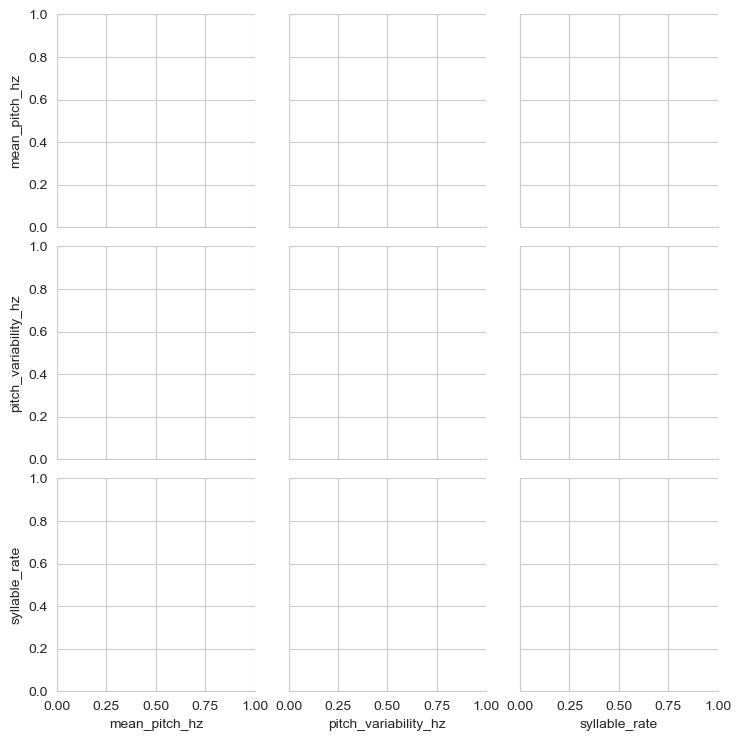

In [15]:
# Scatterplot matrix for key features
key_features = ['mean_pitch_hz', 'pitch_variability_hz', 'syllable_rate']

g = sns.pairplot(df, vars=key_features, hue='emotion', palette='Set1', 
                 diag_kind='kde', plot_kws={'alpha': 0.7, 's': 80})
g.fig.suptitle('Pairwise Relationships of Key Acoustic Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

## 9. Detailed Stimuli Information Table

In [ ]:
# Display full table sorted by emotion and mean pitch
display_cols = ['filename', 'emotion', 'gender', 'adult_kid', 'mean_pitch_hz', 
                'pitch_variability_hz', 'syllable_rate', 'in_pilot', 'in_SL']

df_display = df[display_cols].sort_values(['emotion', 'mean_pitch_hz'])
df_display.style.background_gradient(subset=['mean_pitch_hz', 'pitch_variability_hz', 'syllable_rate'], cmap='YlOrRd')

## 10. Stimuli Selection Recommendations

### For Pre/Post Longitudinal Design Considerations:

In [ ]:
print("=" * 80)
print("STIMULI SELECTION RECOMMENDATIONS")
print("=" * 80)

# Balance check
print("\n1. EMOTION BALANCE:")
print(f"   - Happy: {len(df[df['emotion'] == 'happy'])} stimuli")
print(f"   - Sad: {len(df[df['emotion'] == 'sad'])} stimuli")
print(f"   - Spontaneous: {len(df[df['emotion'] == 'spontaneous'])} stimuli")
print(f"\n   Recommendation: {'BALANCED' if abs(len(df[df['emotion'] == 'happy']) - len(df[df['emotion'] == 'sad'])) <= 1 else 'UNBALANCED - Consider balancing happy/sad'}")

print("\n2. GENDER BALANCE:")
for emotion in ['happy', 'sad']:
    emotion_df = df[df['emotion'] == emotion]
    male_count = len(emotion_df[emotion_df['gender'] == 'male'])
    female_count = len(emotion_df[emotion_df['gender'] == 'female'])
    print(f"   {emotion.capitalize()}: Male={male_count}, Female={female_count}")

print("\n3. ADULT/KID BALANCE:")
for emotion in ['happy', 'sad']:
    emotion_df = df[df['emotion'] == emotion]
    kid_count = len(emotion_df[emotion_df['adult_kid'] == 'kid'])
    adult_count = len(emotion_df[emotion_df['adult_kid'] == 'adult'])
    print(f"   {emotion.capitalize()}: Kid={kid_count}, Adult={adult_count}")

print("\n4. ACOUSTIC FEATURE OVERLAP:")
print("   Checking if happy and sad have overlapping acoustic profiles...")
happy_df = df[df['emotion'] == 'happy']
sad_df = df[df['emotion'] == 'sad']

for feature in ['mean_pitch_hz', 'pitch_variability_hz', 'syllable_rate']:
    happy_range = (happy_df[feature].min(), happy_df[feature].max())
    sad_range = (sad_df[feature].min(), sad_df[feature].max())
    overlap = max(0, min(happy_range[1], sad_range[1]) - max(happy_range[0], sad_range[0]))
    print(f"   {feature}: Happy {happy_range[0]:.1f}-{happy_range[1]:.1f}, Sad {sad_range[0]:.1f}-{sad_range[1]:.1f}")

print("\n5. AVAILABLE FOR NEW EXPERIMENT:")
not_used = df[(df['in_pilot'] == 'N') & (df['in_SL'] == 'N')]
print(f"   Total unused stimuli: {len(not_used)}")
print(f"   - Happy: {len(not_used[not_used['emotion'] == 'happy'])}")
print(f"   - Sad: {len(not_used[not_used['emotion'] == 'sad'])}")
print(f"   - Spontaneous: {len(not_used[not_used['emotion'] == 'spontaneous'])}")

print("\n6. PRE/POST DESIGN SUGGESTIONS:")
print("   - Consider using stimuli NOT in pilot/SL for pre-test")
print("   - Balance gender and adult/kid across conditions")
print("   - Match acoustic features (pitch, variability) between pre/post")
print("   - Counterbalance stimulus presentation order")

## 11. Export Subsets for Experiment Design

In [ ]:
# Create subsets for different experiment phases
unused_stimuli = df[(df['in_pilot'] == 'N') & (df['in_SL'] == 'N')]
pilot_stimuli = df[df['in_pilot'] == 'Y']
sl_stimuli = df[df['in_SL'] == 'Y']

print("Subsets created:")
print(f"  - Unused stimuli: {len(unused_stimuli)}")
print(f"  - Pilot stimuli: {len(pilot_stimuli)}")
print(f"  - SL stimuli: {len(sl_stimuli)}")

# Optional: Save subsets to CSV
# unused_stimuli.to_csv('unused_stimuli.csv', index=False)
# pilot_stimuli.to_csv('pilot_stimuli.csv', index=False)
# sl_stimuli.to_csv('sl_stimuli.csv', index=False)

print("\nUnused Stimuli (Candidates for New Experiment):")
unused_stimuli[display_cols]

## 12. Statistical Tests for Emotion Differences

In [ ]:
# Perform t-tests comparing happy vs sad for each acoustic feature
print("=" * 80)
print("STATISTICAL TESTS: Happy vs Sad")
print("=" * 80)

happy_data = df[df['emotion'] == 'happy']
sad_data = df[df['emotion'] == 'sad']

for feature, title in features[:5]:
    happy_vals = happy_data[feature].dropna()
    sad_vals = sad_data[feature].dropna()
    
    # Perform independent t-test
    t_stat, p_val = stats.ttest_ind(happy_vals, sad_vals)
    
    # Calculate Cohen's d (effect size)
    pooled_std = np.sqrt(((len(happy_vals)-1)*happy_vals.std()**2 + (len(sad_vals)-1)*sad_vals.std()**2) / (len(happy_vals)+len(sad_vals)-2))
    cohens_d = (happy_vals.mean() - sad_vals.mean()) / pooled_std
    
    print(f"\n{title}:")
    print(f"  Happy: M={happy_vals.mean():.2f}, SD={happy_vals.std():.2f}")
    print(f"  Sad:   M={sad_vals.mean():.2f}, SD={sad_vals.std():.2f}")
    print(f"  t({len(happy_vals)+len(sad_vals)-2}) = {t_stat:.3f}, p = {p_val:.4f}")
    print(f"  Cohen's d = {cohens_d:.3f} ({'small' if abs(cohens_d) < 0.5 else 'medium' if abs(cohens_d) < 0.8 else 'large'} effect)")
    print(f"  Significant: {'***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'}")

# Partitioned
- Based on `emotion`, `adult_kid`, `pitch_xxx`

In [20]:
partitioned_df = pd.read_csv('/Users/tongshan/Documents/PRT_EEG/stimuli/partitioned_stories_BalSpont.csv')

## 13. Analyze Differences Between Partitioned Subsets (Pre vs Post)

Analyze the difference between the partitioned subsets:
1. `emotion` (`happy`:`sad`)
2. `adult_kid` (`adult`:`kid`)
3. `pitch_range_hz`
4. `pitch_variability_hz`
5. `mean_pitch_hz`
6. `syllable_rate`
7. `duration_seconds`
8. `phonation_time_ratio`
9. `total_duration_seconds`

In [21]:
# Filter Pre and Post subsets (exclude unassigned)
pre_df = partitioned_df[partitioned_df['AssignedSession'] == 'pre'].copy()
post_df = partitioned_df[partitioned_df['AssignedSession'] == 'post'].copy()

print("=" * 80)
print("PARTITIONED SUBSETS SUMMARY")
print("=" * 80)
print(f"\nPre session: {len(pre_df)} stimuli")
print(f"Post session: {len(post_df)} stimuli")
print(f"Unassigned: {len(partitioned_df[partitioned_df['AssignedSession'] == 'unassigned'])} stimuli")

# Display basic info
print("\n" + "-" * 80)
print("PRE SESSION STIMULI:")
print("-" * 80)
print(pre_df[['filename', 'emotion', 'adult_kid', 'gender']].to_string(index=False))

print("\n" + "-" * 80)
print("POST SESSION STIMULI:")
print("-" * 80)
print(post_df[['filename', 'emotion', 'adult_kid', 'gender']].to_string(index=False))

PARTITIONED SUBSETS SUMMARY

Pre session: 7 stimuli
Post session: 6 stimuli
Unassigned: 2 stimuli

--------------------------------------------------------------------------------
PRE SESSION STIMULI:
--------------------------------------------------------------------------------
                        filename     emotion adult_kid gender
        12008_1_1_sad_studio.wav         sad       kid   male
      12008_1_2_happy_studio.wav       happy       kid   male
        12014_1_2_sad_studio.wav         sad     adult female
12014_1_2_spontaneous_studio.wav spontaneous     adult female
      12015_1_2_happy_studio.wav       happy     adult female
      9227_3_1_Happy1_studio.wav       happy       kid   male
        9227_3_1_Sad2_studio.wav         sad       kid   male

--------------------------------------------------------------------------------
POST SESSION STIMULI:
--------------------------------------------------------------------------------
                       filename     e

### 13.1 Categorical Variables Analysis


1. EMOTION BALANCE (happy:sad)

Pre session:
  Happy: 3, Sad: 3, Ratio (happy:sad): 1.00

Post session:
  Happy: 3, Sad: 2, Ratio (happy:sad): 1.50

Fisher's Exact Test: OR = 0.667, p = 1.0000


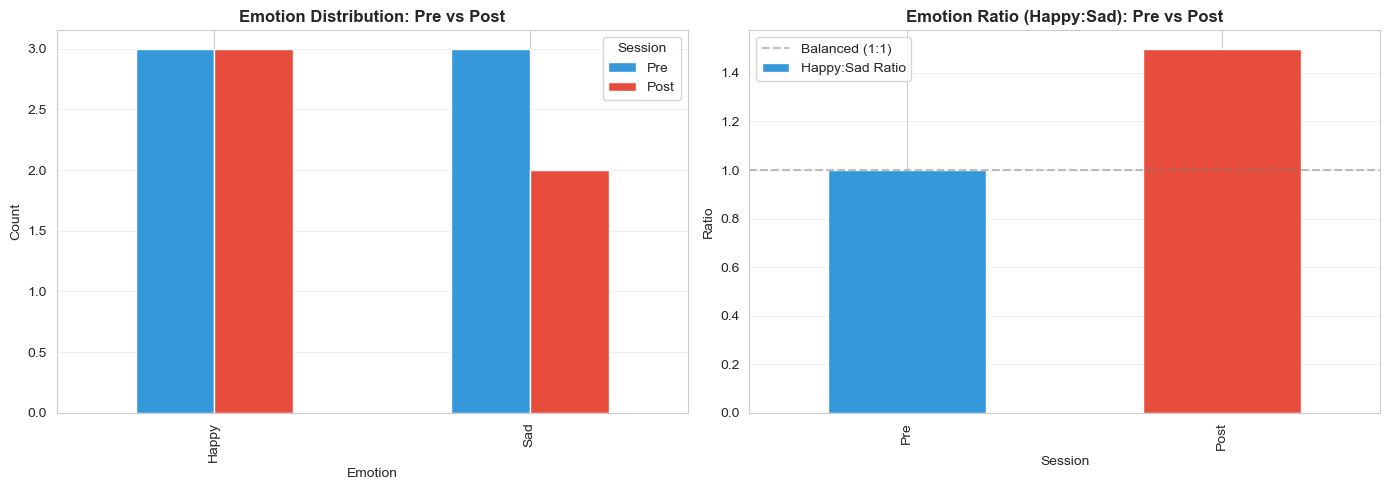

In [22]:
# 1. Analyze emotion (happy:sad) ratio
print("=" * 80)
print("1. EMOTION BALANCE (happy:sad)")
print("=" * 80)

# Filter out spontaneous for emotion analysis
pre_emotion = pre_df[pre_df['emotion'].isin(['happy', 'sad'])]['emotion']
post_emotion = post_df[post_df['emotion'].isin(['happy', 'sad'])]['emotion']

pre_happy = (pre_emotion == 'happy').sum()
pre_sad = (pre_emotion == 'sad').sum()
post_happy = (post_emotion == 'happy').sum()
post_sad = (post_emotion == 'sad').sum()

pre_ratio = pre_happy / pre_sad if pre_sad > 0 else np.inf
post_ratio = post_happy / post_sad if post_sad > 0 else np.inf

print(f"\nPre session:")
print(f"  Happy: {pre_happy}, Sad: {pre_sad}, Ratio (happy:sad): {pre_ratio:.2f}")
print(f"\nPost session:")
print(f"  Happy: {post_happy}, Sad: {post_sad}, Ratio (happy:sad): {post_ratio:.2f}")

# Fisher's exact test for small samples
from scipy.stats import fisher_exact
contingency_emotion = [[pre_happy, pre_sad], [post_happy, post_sad]]
fisher_oddsratio, fisher_p = fisher_exact(contingency_emotion)
print(f"\nFisher's Exact Test: OR = {fisher_oddsratio:.3f}, p = {fisher_p:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Emotion distribution
emotion_data = {
    'Pre': [pre_happy, pre_sad],
    'Post': [post_happy, post_sad]
}
emotion_df_plot = pd.DataFrame(emotion_data, index=['Happy', 'Sad'])
emotion_df_plot.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Emotion Distribution: Pre vs Post', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Emotion')
axes[0].legend(title='Session')
axes[0].grid(axis='y', alpha=0.3)

# Emotion ratio
ratio_data = pd.DataFrame({
    'Session': ['Pre', 'Post'],
    'Happy:Sad Ratio': [pre_ratio, post_ratio]
})
ratio_data.plot(x='Session', y='Happy:Sad Ratio', kind='bar', ax=axes[1], 
                color=['#3498db', '#e74c3c'], legend=False)
axes[1].set_title('Emotion Ratio (Happy:Sad): Pre vs Post', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Ratio')
axes[1].axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Balanced (1:1)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


2. ADULT/KID BALANCE (adult:kid)

Pre session:
  Adult: 3, Kid: 4, Ratio (adult:kid): 0.75

Post session:
  Adult: 4, Kid: 2, Ratio (adult:kid): 2.00

Fisher's Exact Test: OR = 0.375, p = 0.5921


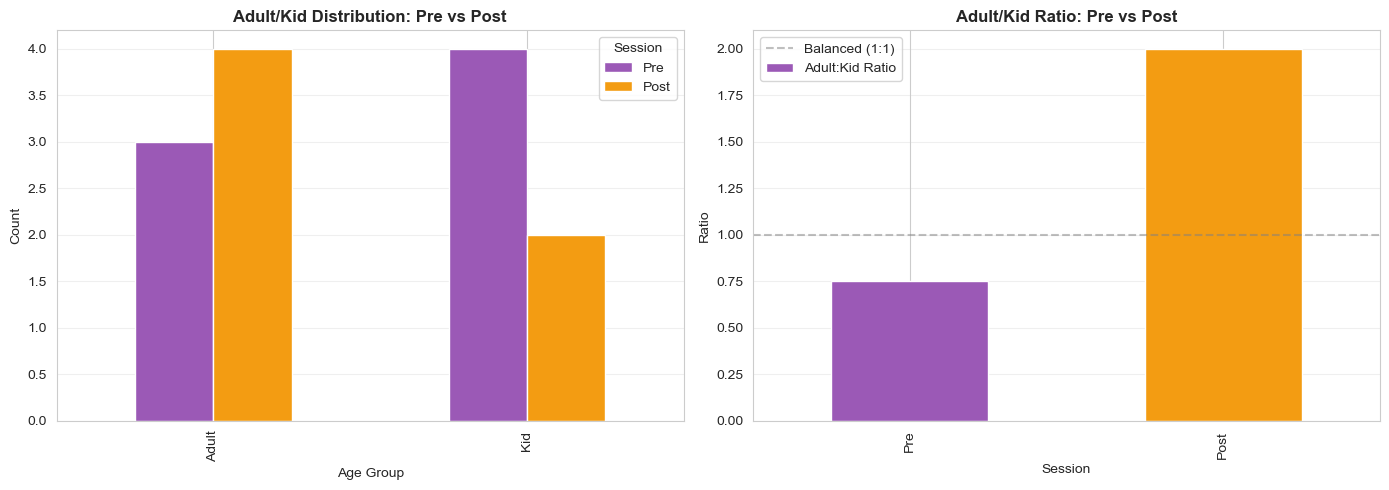

In [23]:
# 2. Analyze adult_kid (adult:kid) ratio
print("=" * 80)
print("2. ADULT/KID BALANCE (adult:kid)")
print("=" * 80)

pre_adult = (pre_df['adult_kid'] == 'adult').sum()
pre_kid = (pre_df['adult_kid'] == 'kid').sum()
post_adult = (post_df['adult_kid'] == 'adult').sum()
post_kid = (post_df['adult_kid'] == 'kid').sum()

pre_ratio_ak = pre_adult / pre_kid if pre_kid > 0 else np.inf
post_ratio_ak = post_adult / post_kid if post_kid > 0 else np.inf

print(f"\nPre session:")
print(f"  Adult: {pre_adult}, Kid: {pre_kid}, Ratio (adult:kid): {pre_ratio_ak:.2f}")
print(f"\nPost session:")
print(f"  Adult: {post_adult}, Kid: {post_kid}, Ratio (adult:kid): {post_ratio_ak:.2f}")

# Fisher's exact test
contingency_ak = [[pre_adult, pre_kid], [post_adult, post_kid]]
fisher_oddsratio_ak, fisher_p_ak = fisher_exact(contingency_ak)
print(f"\nFisher's Exact Test: OR = {fisher_oddsratio_ak:.3f}, p = {fisher_p_ak:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Adult/Kid distribution
ak_data = {
    'Pre': [pre_adult, pre_kid],
    'Post': [post_adult, post_kid]
}
ak_df_plot = pd.DataFrame(ak_data, index=['Adult', 'Kid'])
ak_df_plot.plot(kind='bar', ax=axes[0], color=['#9b59b6', '#f39c12'])
axes[0].set_title('Adult/Kid Distribution: Pre vs Post', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Age Group')
axes[0].legend(title='Session')
axes[0].grid(axis='y', alpha=0.3)

# Adult/Kid ratio
ratio_ak_data = pd.DataFrame({
    'Session': ['Pre', 'Post'],
    'Adult:Kid Ratio': [pre_ratio_ak, post_ratio_ak]
})
ratio_ak_data.plot(x='Session', y='Adult:Kid Ratio', kind='bar', ax=axes[1],
                   color=['#9b59b6', '#f39c12'], legend=False)
axes[1].set_title('Adult/Kid Ratio: Pre vs Post', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Ratio')
axes[1].axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Balanced (1:1)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 13.2 Continuous Variables Analysis


In [24]:
# Define continuous features to analyze
continuous_features = [
    ('pitch_range_hz', 'Pitch Range (Hz)'),
    ('pitch_variability_hz', 'Pitch Variability (Hz)'),
    ('mean_pitch_hz', 'Mean Pitch (Hz)'),
    ('syllable_rate', 'Syllable Rate (syl/sec)'),
    ('duration_seconds', 'Duration (seconds)'),
    ('phonation_time_ratio', 'Phonation Time Ratio')
]

# Create comparison table
comparison_results = []

print("=" * 80)
print("CONTINUOUS VARIABLES: Pre vs Post Comparison")
print("=" * 80)

for feature, title in continuous_features:
    pre_vals = pre_df[feature].dropna()
    post_vals = post_df[feature].dropna()
    
    # Descriptive statistics
    pre_mean = pre_vals.mean()
    pre_std = pre_vals.std()
    post_mean = post_vals.mean()
    post_std = post_vals.std()
    
    # Statistical test
    # Check normality (Shapiro-Wilk test for small samples)
    if len(pre_vals) >= 3 and len(post_vals) >= 3:
        _, p_pre_norm = stats.shapiro(pre_vals)
        _, p_post_norm = stats.shapiro(post_vals)
        use_nonparametric = p_pre_norm < 0.05 or p_post_norm < 0.05
        
        if use_nonparametric:
            # Mann-Whitney U test
            stat, p_val = stats.mannwhitneyu(pre_vals, post_vals, alternative='two-sided')
            test_name = "Mann-Whitney U"
        else:
            # Independent t-test
            stat, p_val = stats.ttest_ind(pre_vals, post_vals)
            test_name = "t-test"
    else:
        # Too few samples, use t-test anyway
        stat, p_val = stats.ttest_ind(pre_vals, post_vals)
        test_name = "t-test"
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(pre_vals)-1)*pre_std**2 + (len(post_vals)-1)*post_std**2) / 
                         (len(pre_vals)+len(post_vals)-2)) if (len(pre_vals)+len(post_vals)-2) > 0 else 1
    cohens_d = (pre_mean - post_mean) / pooled_std if pooled_std > 0 else 0
    
    # Store results
    comparison_results.append({
        'Feature': title,
        'Pre_Mean': pre_mean,
        'Pre_SD': pre_std,
        'Post_Mean': post_mean,
        'Post_SD': post_std,
        'Pre_Format': f"{pre_mean:.3f} ({pre_std:.3f})",
        'Post_Format': f"{post_mean:.3f} ({post_std:.3f})",
        'Test': test_name,
        'Statistic': stat,
        'p_value': p_val,
        "Cohen's_d": cohens_d
    })
    
    # Print results
    print(f"\n{title}:")
    print(f"  Pre:  M = {pre_mean:.3f}, SD = {pre_std:.3f}, n = {len(pre_vals)}")
    print(f"  Post: M = {post_mean:.3f}, SD = {post_std:.3f}, n = {len(post_vals)}")
    print(f"  {test_name}: statistic = {stat:.3f}, p = {p_val:.4f}")
    print(f"  Cohen's d = {cohens_d:.3f} ({'small' if abs(cohens_d) < 0.5 else 'medium' if abs(cohens_d) < 0.8 else 'large'} effect)")
    print(f"  Significant: {'***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'}")

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_results)
print("\n" + "=" * 80)
print("SUMMARY TABLE")
print("=" * 80)
print(comparison_df[['Feature', 'Pre_Format', 'Post_Format', 'p_value', "Cohen's_d"]].to_string(index=False))


CONTINUOUS VARIABLES: Pre vs Post Comparison

Pitch Range (Hz):
  Pre:  M = 314.423, SD = 8.929, n = 7
  Post: M = 316.465, SD = 16.990, n = 6
  Mann-Whitney U: statistic = 10.000, p = 0.1375
  Cohen's d = -0.155 (small effect)
  Significant: ns

Pitch Variability (Hz):
  Pre:  M = 37.221, SD = 9.693, n = 7
  Post: M = 43.883, SD = 7.778, n = 6
  t-test: statistic = -1.349, p = 0.2043
  Cohen's d = -0.751 (medium effect)
  Significant: ns

Mean Pitch (Hz):
  Pre:  M = 226.383, SD = 31.429, n = 7
  Post: M = 232.430, SD = 21.158, n = 6
  t-test: statistic = -0.399, p = 0.6976
  Cohen's d = -0.222 (small effect)
  Significant: ns

Syllable Rate (syl/sec):
  Pre:  M = 5.457, SD = 0.447, n = 7
  Post: M = 6.047, SD = 0.749, n = 6
  t-test: statistic = -1.756, p = 0.1069
  Cohen's d = -0.977 (large effect)
  Significant: ns

Duration (seconds):
  Pre:  M = 171.180, SD = 102.284, n = 7
  Post: M = 192.453, SD = 112.010, n = 6
  Mann-Whitney U: statistic = 20.000, p = 0.9452
  Cohen's d = -0.

In [ ]:
# Visualize continuous variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Acoustic Features: Pre vs Post Comparison', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, (feature, title) in enumerate(continuous_features):
    ax = axes[idx]
    
    # Prepare data for plotting
    plot_data = pd.DataFrame({
        'Session': ['Pre'] * len(pre_df) + ['Post'] * len(post_df),
        'Value': list(pre_df[feature]) + list(post_df[feature])
    })
    
    # Box plot with swarm plot overlay
    sns.boxplot(data=plot_data, x='Session', y='Value', ax=ax, palette=['#3498db', '#e74c3c'])
    sns.swarmplot(data=plot_data, x='Session', y='Value', ax=ax, color='black', alpha=0.5, size=4)
    
    # Add mean markers
    pre_mean = pre_df[feature].mean()
    post_mean = post_df[feature].mean()
    ax.scatter([0], [pre_mean], color='yellow', s=100, marker='D', zorder=5, label='Mean')
    ax.scatter([1], [post_mean], color='yellow', s=100, marker='D', zorder=5)
    
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_xlabel('Session')
    ax.set_ylabel(title)
    ax.grid(axis='y', alpha=0.3)
    if idx == 0:
        ax.legend()

plt.tight_layout()
plt.show()


### 13.3 Total Duration Analysis


In [ ]:
# 9. Analyze total_duration_seconds (sum of duration_seconds)
print("=" * 80)
print("9. TOTAL DURATION (sum of duration_seconds)")
print("=" * 80)

pre_total_duration = pre_df['duration_seconds'].sum()
post_total_duration = post_df['duration_seconds'].sum()
difference = abs(pre_total_duration - post_total_duration)
difference_pct = (difference / max(pre_total_duration, post_total_duration)) * 100

print(f"\nPre session total duration:  {pre_total_duration:.2f} seconds ({pre_total_duration/60:.2f} minutes)")
print(f"Post session total duration: {post_total_duration:.2f} seconds ({post_total_duration/60:.2f} minutes)")
print(f"Difference: {difference:.2f} seconds ({difference_pct:.2f}%)")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
duration_data = pd.DataFrame({
    'Session': ['Pre', 'Post'],
    'Total Duration (seconds)': [pre_total_duration, post_total_duration],
    'Total Duration (minutes)': [pre_total_duration/60, post_total_duration/60]
})

bars = ax.bar(duration_data['Session'], duration_data['Total Duration (seconds)'], 
              color=['#3498db', '#e74c3c'], edgecolor='black', alpha=0.7)
ax.set_title('Total Duration: Pre vs Post', fontweight='bold', fontsize=14)
ax.set_ylabel('Total Duration (seconds)')
ax.set_xlabel('Session')

# Add value labels on bars
for i, (bar, sec, min_val) in enumerate(zip(bars, duration_data['Total Duration (seconds)'], 
                                             duration_data['Total Duration (minutes)'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{sec:.1f}s\n({min_val:.1f}min)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Add to comparison results
comparison_results.append({
    'Feature': 'Total Duration (seconds)',
    'Pre_Mean': pre_total_duration,
    'Pre_SD': 0,  # Single value
    'Post_Mean': post_total_duration,
    'Post_SD': 0,
    'Pre_Format': f"{pre_total_duration:.2f}",
    'Post_Format': f"{post_total_duration:.2f}",
    'Test': 'N/A',
    'Statistic': np.nan,
    'p_value': np.nan,
    "Cohen's_d": np.nan
})


### 13.4 Comprehensive Comparison Table


In [ ]:
# Create comprehensive comparison table including categorical variables
print("=" * 80)
print("COMPREHENSIVE COMPARISON: Pre vs Post")
print("=" * 80)

# Prepare categorical results
categorical_results = []

# Emotion ratio
emotion_pre_str = f"{pre_happy}/{pre_sad} ({pre_ratio:.2f})"
emotion_post_str = f"{post_happy}/{post_sad} ({post_ratio:.2f})"
categorical_results.append({
    'Feature': 'emotion (happy:sad)',
    'Pre': emotion_pre_str,
    'Post': emotion_post_str,
    'p_value': fisher_p,
    "Effect_Size": fisher_oddsratio
})

# Adult/Kid ratio
ak_pre_str = f"{pre_adult}/{pre_kid} ({pre_ratio_ak:.2f})"
ak_post_str = f"{post_adult}/{post_kid} ({post_ratio_ak:.2f})"
categorical_results.append({
    'Feature': 'adult_kid (adult:kid)',
    'Pre': ak_pre_str,
    'Post': ak_post_str,
    'p_value': fisher_p_ak,
    "Effect_Size": fisher_oddsratio_ak
})

# Combine all results
final_comparison = pd.DataFrame(categorical_results + [
    {
        'Feature': row['Feature'],
        'Pre': row['Pre_Format'],
        'Post': row['Post_Format'],
        'p_value': row['p_value'],
        'Effect_Size': row["Cohen's_d"] if not np.isnan(row["Cohen's_d"]) else 'N/A'
    }
    for row in comparison_results
])

print("\n" + final_comparison.to_string(index=False))

# Save to CSV (optional)
# final_comparison.to_csv('partitioned_subset_comparison.csv', index=False)
# print("\nComparison table saved to 'partitioned_subset_comparison.csv'")
